# Using CLIP for 0-shot classification and image search

In [2]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Application 1: Image classification

In [3]:
def classify_image(image, text_classes):
    """
        Helper function to do 0-shot image classfication with CLIP
    """

    # pass image and text classes to processor
    inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)
    # pass inputs to CLIP
    outputs = model(**inputs) # note: "**" unpacks dictionary items
    logits_per_image = outputs.logits_per_image # image-text similarity score
    probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax
    # prediction
    predicted_class = text_classes[probs.argmax()]
    prob_class = round(float(probs[0][probs.argmax()]),4)

    return predicted_class, prob_class

In [4]:
def image_search(image_list, query):
    """
        Helper function to match query to an image in image_list
    """

    inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    
    logits_per_text = outputs.logits_per_text
    probs = logits_per_text.softmax(dim=1)

    # best match
    best_match = image_list[probs.argmax()]
    prob_match = round(float(probs[0][probs.argmax()]),4)

    return best_match, prob_match

In [5]:
# import model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

# import processor (handles text tokenization and image preprocessing)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16") 

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

C:\Users\deepa\anaconda3\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\deepa\.cache\huggingface\hub\models--openai--clip-vit-base-patch16. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [6]:
# load image
image = Image.open("C:/Users/deepa/OneDrive/Desktop/cat_cute.jpg")

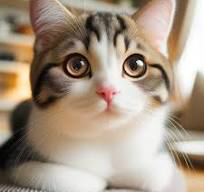

In [7]:
image

In [8]:
# define text classes
text_classes = ["A photo of a Cat", "A photo of a Dog"]

# pass image and text classes to processor
inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)

In [9]:
# pass inputs to CLIP
outputs = model(**inputs) # note: "**" unpacks dictionary items
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # convert scores to probabilties via softmax

In [10]:
# print prediction
predicted_class = text_classes[probs.argmax()]
print(predicted_class, "| Probability = ", round(float(probs[0][probs.argmax()]),4))

A photo of a Cat | Probability =  0.999


In [22]:
# define text classes
text_classes = ["cute dog", "cute cat","cute boy","a goat"]

predicted_class, prob_class = classify_image(image, text_classes)
print(predicted_class, "| Probability = ", prob_class)

cute cat | Probability =  0.9896


# Application 2: Image Search

In [23]:
# create list of images to search over
image_name_list = ["C:/Users/deepa/OneDrive/Desktop/cat_cute.jpg", "C:/Users/deepa/OneDrive/Desktop/dog.jpg", "C:/Users/deepa/OneDrive/Desktop/boy.jpg","C:/Users/deepa/OneDrive/Desktop/goat.jpg"]

image_list = []
for image_name in image_name_list:
    image_list.append(Image.open(image_name))

In [24]:
# define a query
query = "a cute dog"

In [25]:
# pass images and query to CLIP
inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)

Match probability:  0.8613


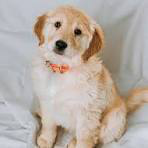

In [26]:
# print best match
best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),4)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.9983


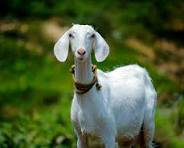

In [32]:
query = "a goat"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.8447


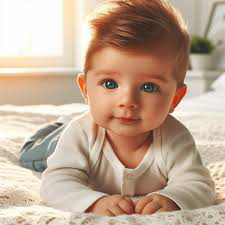

In [36]:
query = "a cute and little boy"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.8214


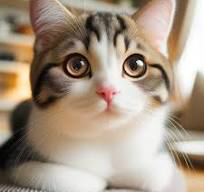

In [31]:
query = "the best pet in the world"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)

Match probability:  0.7178


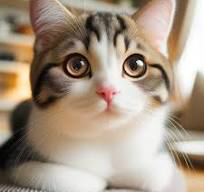

In [35]:
query = "anything cute"

best_match, prob_match = image_search(image_list, query)

print("Match probability: ",prob_match)
display(best_match)